In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category =FutureWarning)

In [2]:
dt = pd.read_csv("C:\\Users\\Paras Sharma\\OneDrive\\Documents\\Iris\\Iris.csv")

In [3]:
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Drop the Id column which does not have any impact on the model training.
dt = dt.drop(columns = ['Id'])
dt.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Describing the data.
dt.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Gathering basic information about the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# displaying the total values count 
dt.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [8]:
# displaying if there is any null values 
dt.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# to display the number of sample on each class
dt['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Exploratory Data Analysis

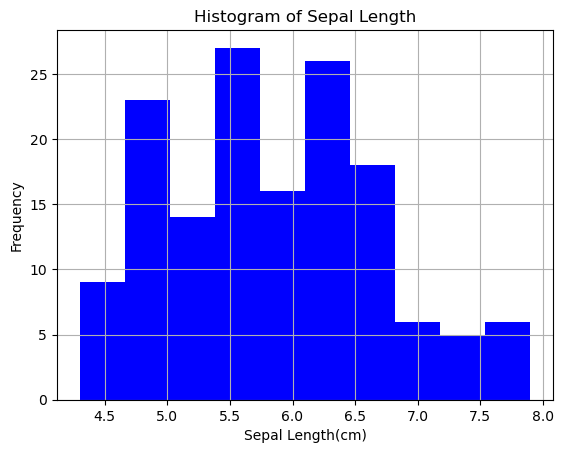

In [10]:
# HISTOGRAMS
dt['SepalLengthCm'].hist(color='blue')  
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

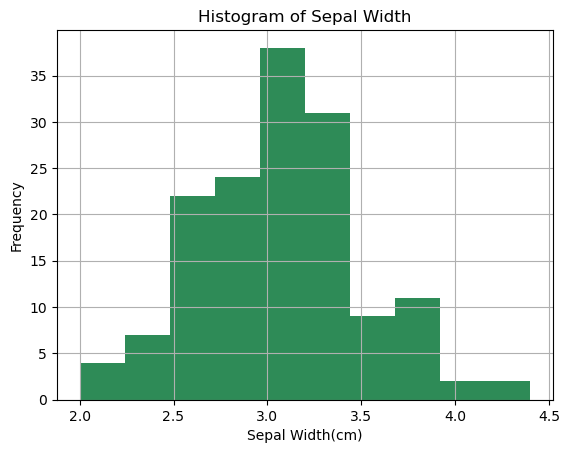

In [11]:
dt['SepalWidthCm'].hist(color='seagreen')  
plt.xlabel('Sepal Width(cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width')
plt.show()

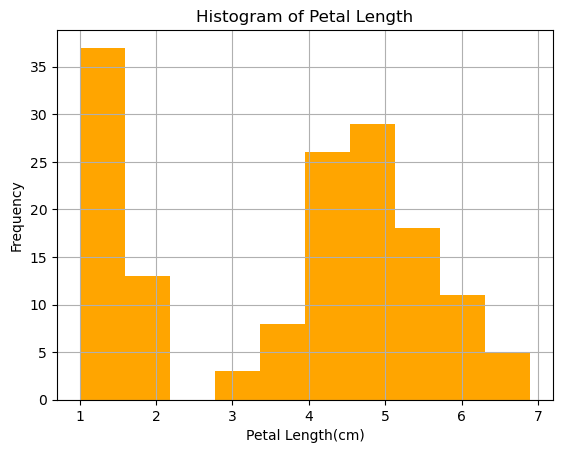

In [12]:
dt['PetalLengthCm'].hist(color='orange')  
plt.xlabel('Petal Length(cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()

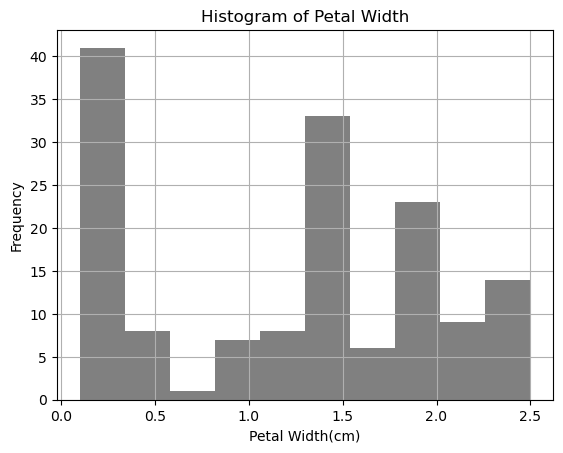

In [13]:
dt['PetalWidthCm'].hist(color='grey')  
plt.xlabel('Petal Width(cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

In [14]:
#SCATTERPLOT
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

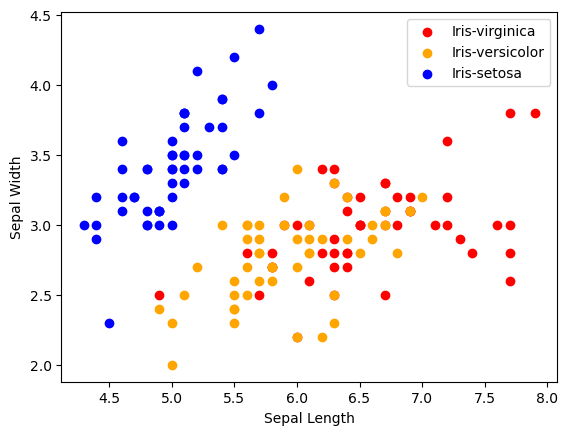

In [15]:
for i in range(3):
    x = dt[dt['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

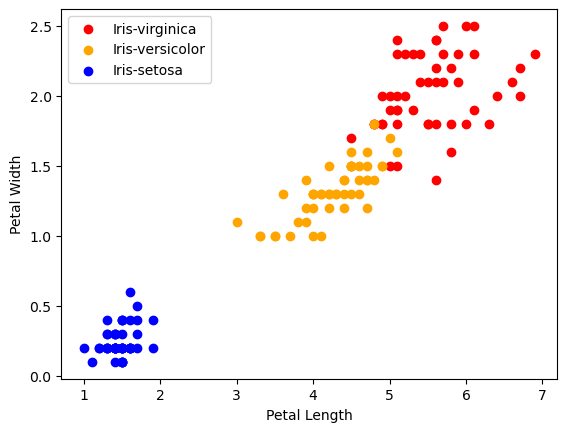

In [16]:
for i in range(3):
    x = dt[dt['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

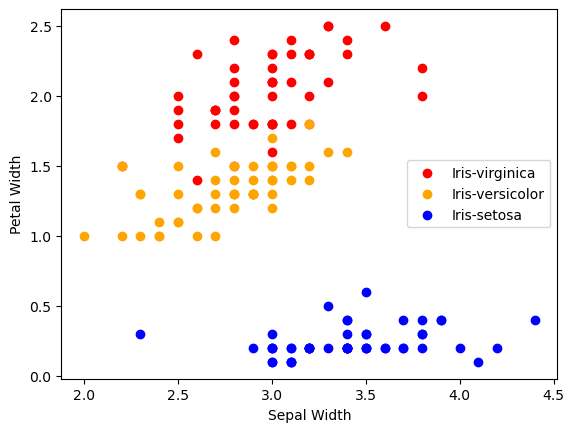

In [17]:
for i in range(3):
    x = dt[dt['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()


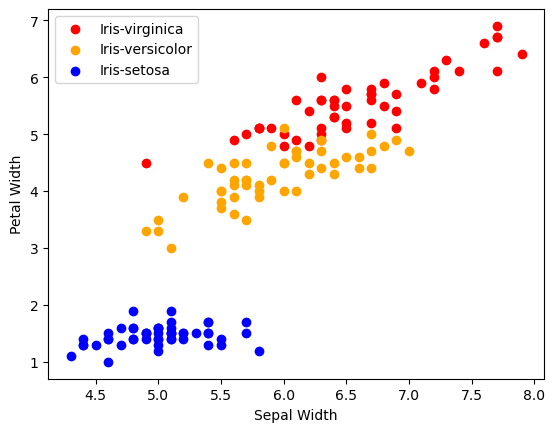

In [18]:
for i in range(3):
    x = dt[dt['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()


### Correlation Matrix

In [19]:
dt.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

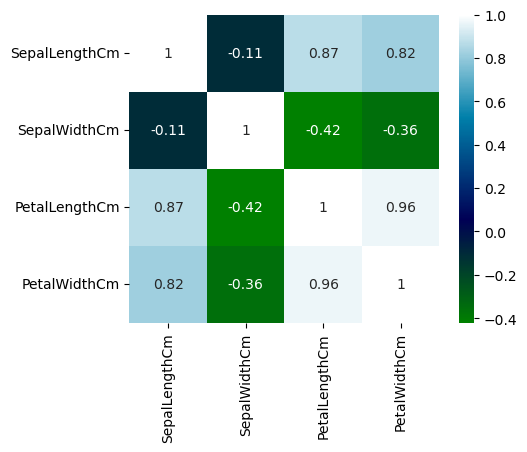

In [20]:
corr = dt.corr()
fig , ax =plt.subplots(figsize = (5,4))
sns.heatmap(corr , annot =True ,ax=ax ,cmap ='ocean')

### Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
dt['Species'] = le.fit_transform(dt['Species'])

In [23]:
dt.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [24]:
from sklearn.model_selection import train_test_split
X = dt.drop(columns = ['Species'])
Y = dt['Species']
x_train ,x_test ,y_train ,y_test = train_test_split(X ,Y ,test_size =0.2)

LogisticRegression Accuracy: 83 %
LogisticRegression Precision: 0.8633333333333333
LogisticRegression: 0.8333333333333334
LogisticRegression: 0.8371696504688833
Confusion Matrix
[[10  0  0]
 [ 0  6  1]
 [ 0  4  9]]


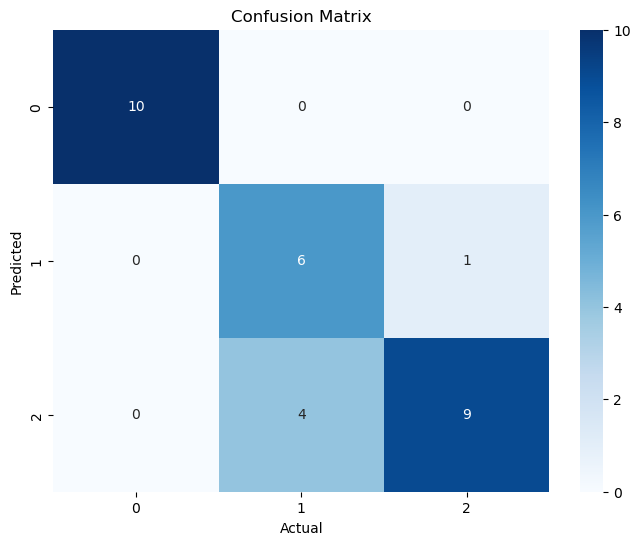

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 1000)
LR.fit(x_train , y_train)
y_pred = LR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("LogisticRegression Accuracy:", int(100*accuracy),"%")
print("LogisticRegression Precision:", precision)
print("LogisticRegression:", recall)
print("LogisticRegression:", f1)
print("Confusion Matrix")
print(conf_matrix)


plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

KNN Accuracy: 90 %
KNN Precision: 0.9055555555555554
KNN Recall: 0.9
KNN F1 score: 0.9013333333333333
Confusion Matrix
[[10  0  0]
 [ 0  6  1]
 [ 0  2 11]]


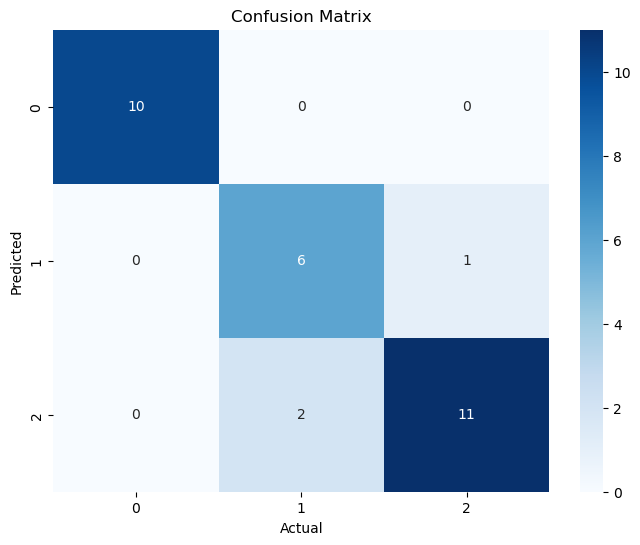

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3 )
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("KNN Accuracy:", int(100*accuracy),"%")
print("KNN Precision:", precision)
print("KNN Recall:", recall)
print("KNN F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)


plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

SVM Accuracy: 83 %
SVM Precision: 0.8633333333333333
SVM Recall: 0.8333333333333334
SVM F1 score: 0.8371696504688833
Confusion Matrix
[[10  0  0]
 [ 0  6  1]
 [ 0  4  9]]


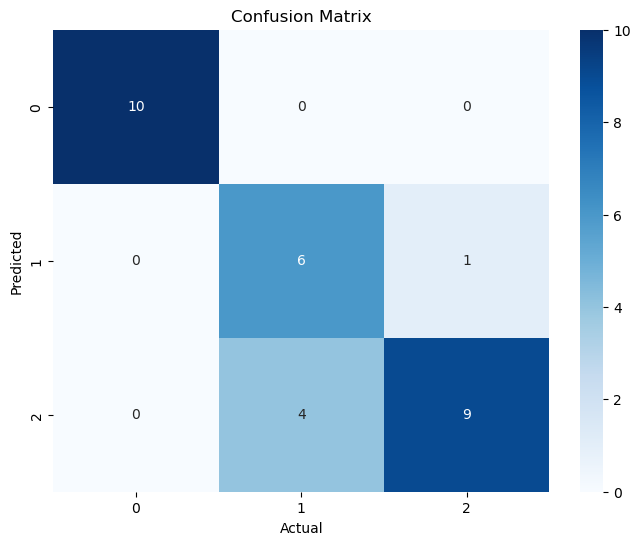

In [27]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("SVM Accuracy:", int(100*accuracy),"%")
print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()



In [28]:
# save the model
import pickle

In [32]:
filename = 'best_model1.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(knn , file)
    print("Model Saved Successfully")
except Exception as e:
    print(f"There is an error: {e}")

Model Saved Successfully


In [33]:
load_model = pickle.load(open(filename,'rb'))

In [34]:
# Map numerical predictions to class labels
class_labels = ["Setosa", "Versicolor", "Virginica"]
predicted_class = class_labels[load_model.predict([[6.5, 3.0, 5.5, 1.8]])[0]]

print("Predicted class label:", predicted_class)


Predicted class label: Virginica


C:\Users\Paras Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
